# Analysis of published papers

In [1]:
%run setup.py

In [4]:
df_Invited['Paper Count'].mean(), df_Proceedings['Paper Count'].mean()

(89.00152555301297, 55.19342060645917)

In [2]:
df_Invited = pd.read_csv(os.path.join(filepath,'factInvited.csv'))
df_Proceedings = pd.read_csv(os.path.join(filepath,'factProceedings.csv'))

df_Proceedings.head()

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,column_equal,Paper Count,Max Paper Count,First year paper,ID,Age,Productivity,Conference (long),Main Topic
0,Aaron Gage,2004,AAAI,Aaron,NaN,Gage,M,True,7,8,1999,Aaron Gage_1,5,1.400000,AAAI Conference on Artificial Intelligence,Artificial Intelligence
1,Abhi Shelat,2004,AAAI,Abhi,NaN,Shelat,M,True,7,75,2002,Abhi Shelat_1,2,3.500000,AAAI Conference on Artificial Intelligence,Artificial Intelligence
2,Adele E. Howe,2004,AAAI,Adele,E.,Howe,F,True,48,91,1986,Adele E. Howe_1,18,2.666667,AAAI Conference on Artificial Intelligence,Artificial Intelligence
3,Akihiro Kishimoto,2004,AAAI,Akihiro,NaN,Kishimoto,M,True,4,62,2002,Akihiro Kishimoto_1,2,2.000000,AAAI Conference on Artificial Intelligence,Artificial Intelligence
4,Al Globus,2004,AAAI,Al,NaN,Globus,M,True,6,6,1990,Al Globus_1,14,0.428571,AAAI Conference on Artificial Intelligence,Artificial Intelligence


### Define function

In [23]:
def plot_hist(list1,list1_label, list2,list2_label,fig_title,n_bins):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    bins=np.histogram(np.hstack((list1,list2)), bins=n_bins)[1]
    
    ax1.hist(list2, bins=bins, alpha=0.7, label=list2_label,density=True)
    ax1.hist(list1, bins=bins, alpha=0.7, label=list1_label,density=True)
    ax1.set_xlabel('Number of publications',fontsize=16)
    ax1.set_ylabel('Density',fontsize=16)
    ax1.set_title('Distribution of publications per speaker',fontsize=19)
    ax1.legend(loc='upper right',fontsize=13)
    ax1.tick_params(axis='both', labelsize=12)
    
    # Prepare data for log-log histogram
    bins = np.logspace(np.log10(min(list1)), np.log10(max(list1)), 20)
    hist,edges = np.histogram(list1, bins=bins, density=True)
    x = (edges[1:]+edges[:-1])/2.

    bins1 = np.logspace(np.log10(min(list2)), np.log10(max(list2)), 20)
    hist1,edges1 = np.histogram(list2, bins=bins, density=True)
    x1 = (edges1[1:]+edges1[:-1])/2.
    
    xx,yy = zip(*[(i,j) for (i,j) in zip(x,hist) if j>0])
    xx1,yy1 = zip(*[(i,j) for (i,j) in zip(x1,hist1) if j>0])
    
    
    ax2.plot(xx1, yy1, label=list2_label,marker='.')
    ax2.plot(xx, yy, label=list1_label,marker='.')
    ax2.set_xlabel('$log$(Number of publications)',fontsize=16)
    ax2.set_ylabel('Probability Density',fontsize=16)
    ax2.set_title('Distribution of $log$(publications) per speaker',fontsize=19)
    ax2.legend(loc='upper right',fontsize=13)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.tick_params(axis='both', labelsize=12)
        
    fig.suptitle(fig_title, fontsize=14)
    
    plt.show()

In [25]:
def single_plot_hist(list1,list1_label, list2,list2_label,fig_title,n_bins,title):
    fig, (ax1) = plt.subplots(1, 1, figsize=(7, 5))

    bins=np.histogram(np.hstack((list1,list2)), bins=n_bins)[1]
    
    ax1.hist(list1, bins=bins, alpha=0.7, label=list1_label,density=True)
    ax1.hist(list2, bins=bins, alpha=0.7, label=list2_label,density=True)
    ax1.set_xlabel('Number of publications',fontsize=16)
    ax1.set_ylabel('Density',fontsize=16)
    ax1.set_title(title,fontsize=19)
    ax1.legend(loc='upper right',fontsize=13)
    ax1.tick_params(axis='both', labelsize=12)
    plt.show()

## Histogram between invited/proceedings

In [5]:
# Create lists
paper_per_pro = df_Proceedings['Paper Count'].values
paper_per_inv = df_Invited['Paper Count'].values

# drop all the rows with 0 paper count
paper_per_inv = paper_per_inv[paper_per_inv != 0]
paper_per_pro = paper_per_pro[paper_per_pro != 0]

In [6]:
np.mean(paper_per_inv), np.mean(paper_per_pro)

(96.99168744804655, 55.42750340529162)

In [68]:
max(paper_per_inv),max(paper_per_pro)

(938, 1596)

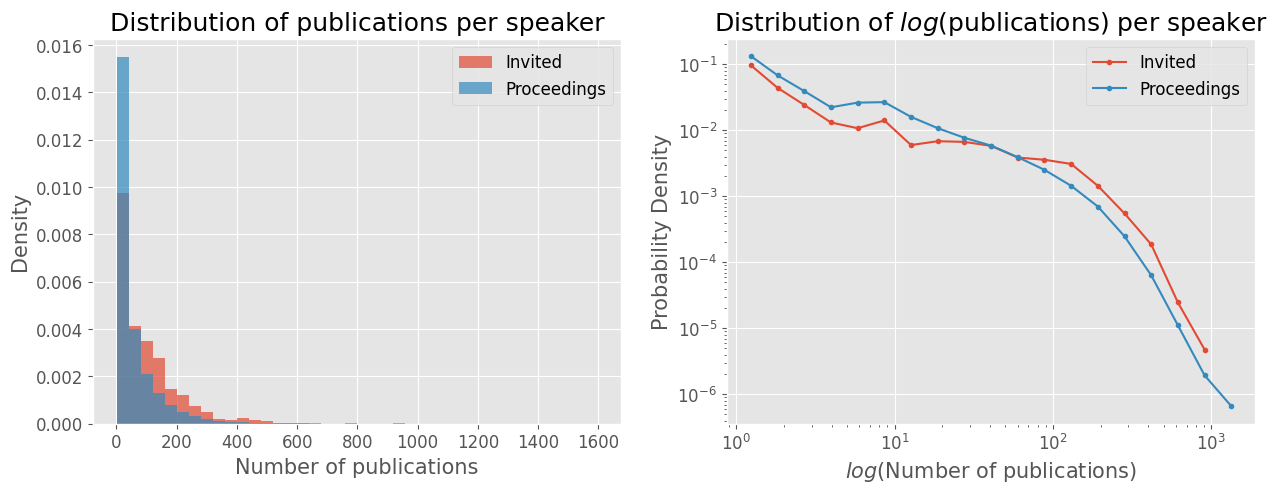

In [20]:
plot_hist(paper_per_pro,'Proceedings',paper_per_inv,'Invited','',40)

In [41]:
df_Invited['Paper Count'].value_counts()

0      108
1       55
2       37
3       30
4       24
      ... 
283      1
469      1
279      1
487      1
386      1
Name: Paper Count, Length: 303, dtype: int64

In [25]:
df_Proceedings.groupby('ID')['Paper Count'].sum().sort_values(ascending=False).head(10)

ID
Philip S. Yu_1          124067
Qiang Yang_3             48098
Michael I. Jordan_1      42321
Christos Faloutsos_1     36573
Yoshua Bengio_1          34593
Heng Huang_1             33334
Lawrence Carin_1         32701
Bernhard Schölkopf_1     32013
Thomas S. Huang_1        31760
Hui Xiong_2              30440
Name: Paper Count, dtype: int64

In [15]:
df_Proceedings['Paper Count'].sort_values(ascending=False).head(10)

70733     1596
123447    1501
30185     1501
123446    1501
123445    1501
123450    1501
30186     1501
123448    1501
193523    1501
123449    1501
Name: Paper Count, dtype: int64

By setting the density to True, I compensate for the fact that there a many more proceedings than invited papers. 

## Histogram between females and males

In [27]:
# combine the values from Paper Count column from both the dataframes (df_Invited and df_Proceedings) where the gender column is "M" 
paper_per_male = list(df_Proceedings[df_Proceedings['gender'] == 'M']['Paper Count'].values) + list(df_Invited[df_Invited['gender'] == 'M']['Paper Count'].values)
paper_per_female = list(df_Proceedings[df_Proceedings['gender'] == 'F']['Paper Count'].values) + list(df_Invited[df_Invited['gender'] == 'F']['Paper Count'].values)

# drop all the rows with 0 paper count
paper_per_male = [x for x in paper_per_male if x != 0]
paper_per_female = [x for x in paper_per_female if x != 0]

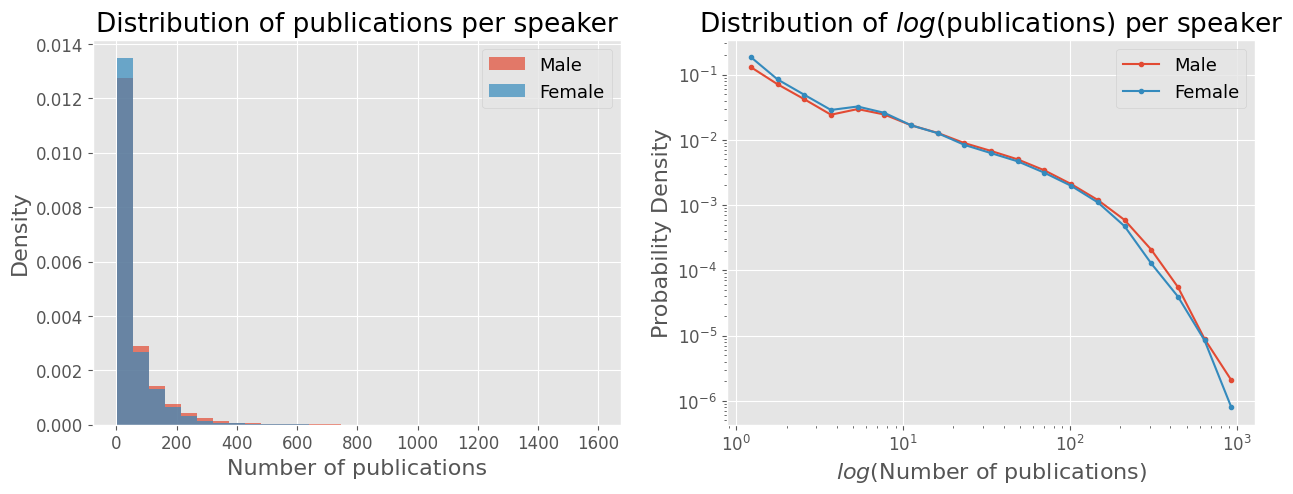

In [28]:
plot_hist(paper_per_female,'Female',paper_per_male,'Male','',30)

No difference, but is heavily impacted of proceedings

## Histogram between females and males for invited

In [29]:
# combine the values from Paper Count column from both the dataframes (df_Invited and df_Proceedings) where the gender column is "M" 
paper_per_male_inv = df_Invited[df_Invited['gender'] == 'M']['Paper Count'].values
paper_per_female_inv = df_Invited[df_Invited['gender'] == 'F']['Paper Count'].values

# drop all the rows with 0 paper count
paper_per_male_inv = paper_per_male_inv[paper_per_male_inv != 0]
paper_per_female_inv = paper_per_female_inv[paper_per_female_inv != 0]

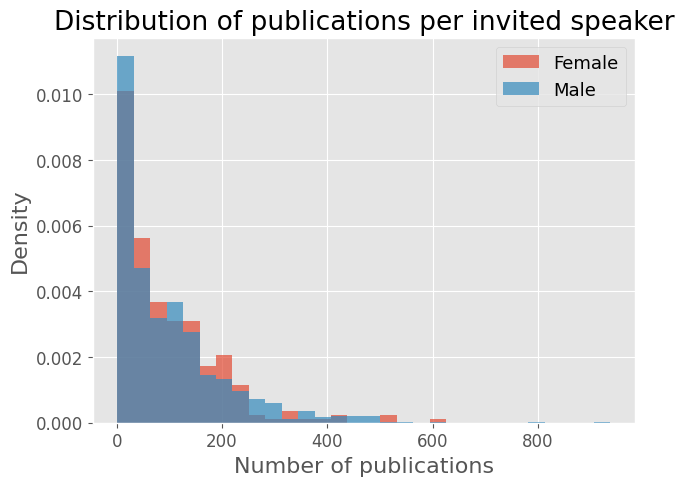

In [33]:
single_plot_hist(paper_per_female_inv,'Female',paper_per_male_inv,'Male','Invited',30,'Distribution of publications per invited speaker')

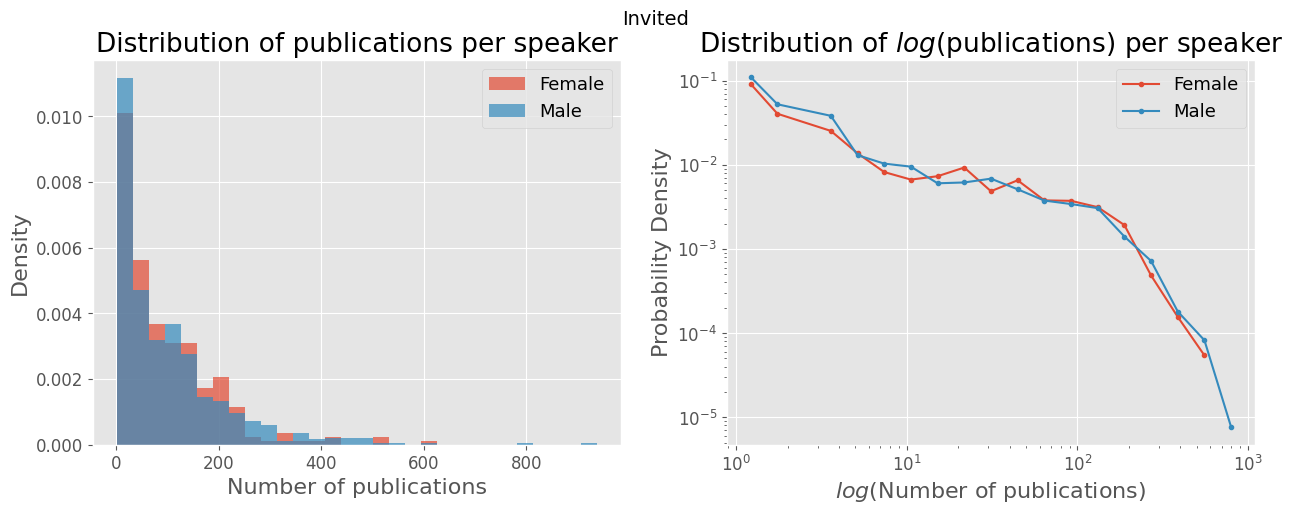

In [43]:
plot_hist(paper_per_male_inv,'Male',paper_per_female_inv,'Female','Invited',30)

## Histogram between females and males for proceedings

In [31]:
# combine the values from Paper Count column from both the dataframes (df_Invited and df_Proceedings) where the gender column is "M" 
paper_per_male_pro = df_Proceedings[df_Proceedings['gender'] == 'M']['Paper Count'].values
paper_per_female_pro = df_Proceedings[df_Proceedings['gender'] == 'F']['Paper Count'].values

# drop all the rows with 0 paper count
paper_per_male_pro = paper_per_male_pro[paper_per_male_pro != 0]
paper_per_female_pro = paper_per_female_pro[paper_per_female_pro != 0]

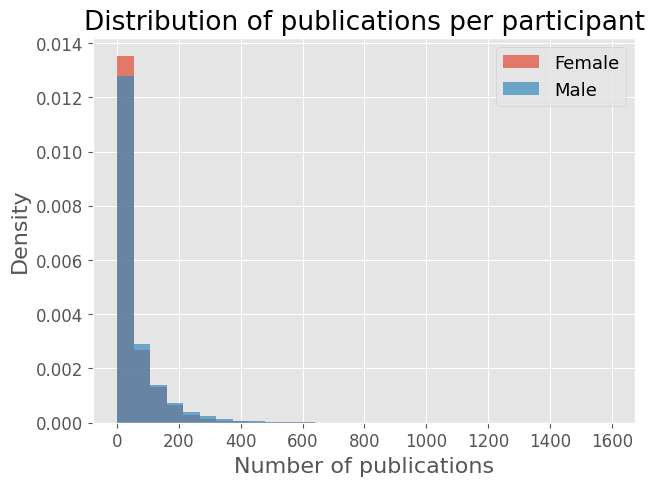

In [34]:
single_plot_hist(paper_per_female_pro,'Female',paper_per_male_pro,'Male','Invited',30,'Distribution of publications per participant')

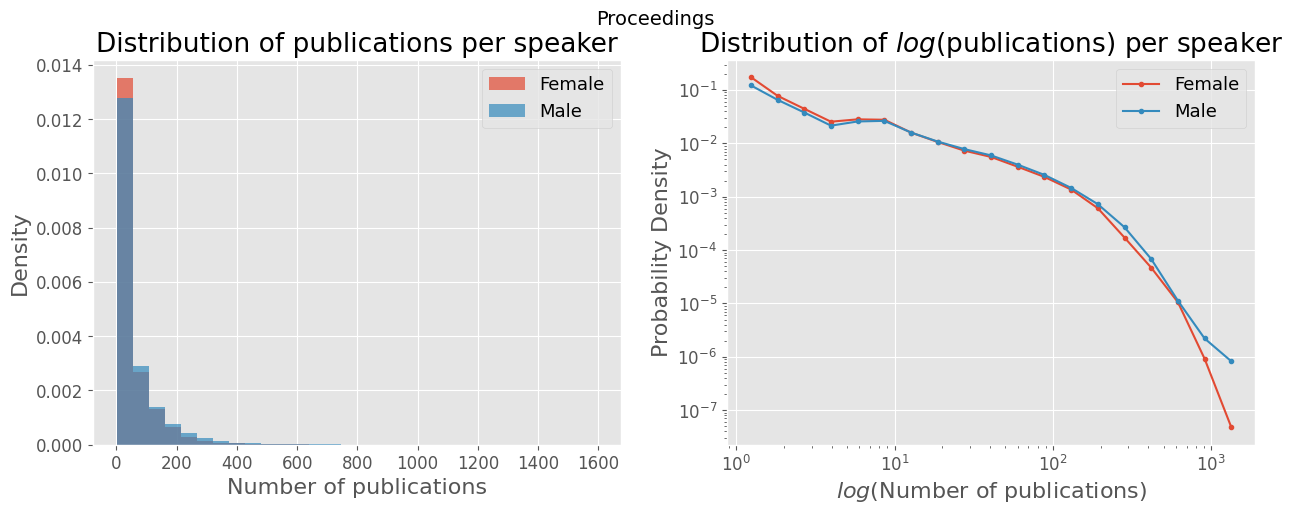

In [42]:
plot_hist(paper_per_male_pro,'Male',paper_per_female_pro,'Female','Proceedings',30)

## Histogram of fields

### Define function

In [89]:
def get_field_lists(df,field):
    df = df[df['Main Topic'] == field]
    list_M = df[df['gender'] == "M"]['Paper Count'].values
    list_F = df[df['gender'] == "F"]['Paper Count'].values
    
    list_M = list_M[list_M != 0]
    list_F = list_F[list_F != 0]
    return list_M,list_F

conference_list = list(df_Invited['Main Topic'].unique())

In [90]:
conference_list

['Artificial Intelligence',
 'Computer Architecture',
 'Human-Computer Interaction',
 'Concurrent, distributed and parallel computing',
 'Computational Social Science',
 'Data Management',
 'Algorithm and Theory']

43.86 % of the data set is in this field: Artificial Intelligence


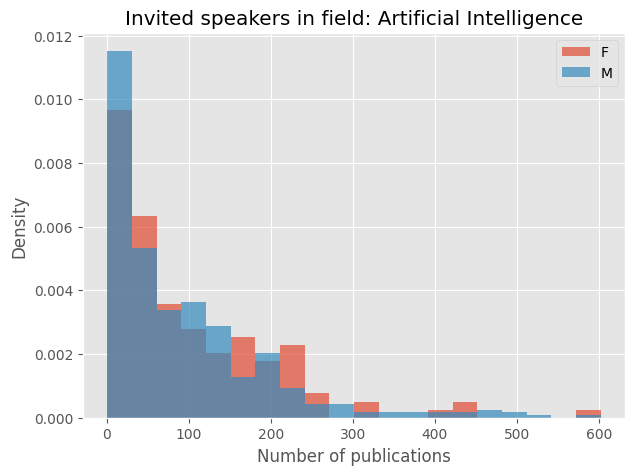

In [95]:
id = 0
print(round(df_Invited[df_Invited['Main Topic'] == conference_list[id]].shape[0]/df_Invited.shape[0]*100,2),'% of the data set is in this field:',conference_list[id])
paper_male_inv_field, paper_female_inv_field = get_field_lists(df_Invited, conference_list[id])
single_plot_hist(paper_female_inv_field,'F',paper_male_inv_field,'M','Invited',20,'Invited speakers in field: ' + conference_list[id])
# plot_hist(age_male_inv_field,'Male',age_female_inv_field,'Female','Invited speakers in field: ' + conference_list[id],15)

id 0 = no data <br>
id 1 = gaps <br>
id 2 = women are following along <br>
id 3 = not many women <br>
id 4 = not much data <br>
id 5 = gaps? <br>
id 6 = ? <br>
id 7 = there is a gap <br>